# 배치 정규화 알고리즘 
(p. 210) 

> 핵심: 신경망 각 층의 데이터 분포를 정규분포로 만든다. 

<b>기대 효과</b>
* 초깃값 문제X 
* 오버피팅 억제 

In [1]:
# coding: utf-8 
import sys, os 
sys.path.append(os.pardir)  # 부모 디렉토리를 scope에 추가해서 파일을 가져올 수 있게 
import numpy as np 
import matplotlib.pyplot as plt 
from dataset.mnist import load_mnist 
from common.multi_layer_net_extend import MultiLayerNetExtend 
from common.optimizer import SGD, Adam

### 1. 데이터 로드 

In [2]:
(x_train, t_train), (x_test, t_test)  =  load_mnist(normalize=True)
print("원본 데이터 사이즈 of x_train:", x_train.shape)
print("원본 데이터 사이즈 of t_train:", t_train.shape)
print("")

# 학습 데이터양을 줄임: 60000장은 너무 많으니까 
x_train = x_train[:1000]
t_train = t_train[:1000]

print("축소 사이즈 of x_train:", x_train.shape)
print("축소 사이즈 of t_train:", t_train.shape)

원본 데이터 사이즈 of x_train: (60000, 784)
원본 데이터 사이즈 of t_train: (60000,)

축소 사이즈 of x_train: (1000, 784)
축소 사이즈 of t_train: (1000,)


### 2. 학습 셋업 

In [3]:
max_epochs    = 20 
train_size    = x_train.shape[0]  # 학습데이터 1000개 

batch_size    = 100               # 미니배치 학습 
learning_rate = 0.01 

### 3. 네트워크 정의 

In [4]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

1. input_size = 784    
  *  28x28 이미지 
2. hidden_size_list = \[100, 100, 100, 100, 100\]
  * 5층 구조에 각 노드 100개 
3. output_size = 10 
  * 출력 노드 개수 (숫자 클래스 10개)

### 4. 학습 및 그래프 그리기 

============== 1/16 ==============
epoch:0 | 0.097 - 0.086
epoch:1 | 0.097 - 0.101


..\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\Guhnoo_KIST\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:2 | 0.097 - 0.107
epoch:3 | 0.097 - 0.142
epoch:4 | 0.097 - 0.169
epoch:5 | 0.097 - 0.19
epoch:6 | 0.097 - 0.218
epoch:7 | 0.097 - 0.235
epoch:8 | 0.097 - 0.249
epoch:9 | 0.097 - 0.268
epoch:10 | 0.097 - 0.292
epoch:11 | 0.097 - 0.315
epoch:12 | 0.097 - 0.331
epoch:13 | 0.097 - 0.348
epoch:14 | 0.097 - 0.354
epoch:15 | 0.097 - 0.367
epoch:16 | 0.097 - 0.392
epoch:17 | 0.097 - 0.407
epoch:18 | 0.097 - 0.419


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.427
============== 2/16 ==============
epoch:0 | 0.116 - 0.108
epoch:1 | 0.097 - 0.101


..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:2 | 0.097 - 0.11
epoch:3 | 0.097 - 0.129
epoch:4 | 0.097 - 0.139
epoch:5 | 0.097 - 0.159
epoch:6 | 0.097 - 0.18
epoch:7 | 0.097 - 0.211
epoch:8 | 0.097 - 0.227
epoch:9 | 0.097 - 0.255
epoch:10 | 0.097 - 0.271
epoch:11 | 0.097 - 0.29
epoch:12 | 0.097 - 0.325
epoch:13 | 0.097 - 0.35
epoch:14 | 0.097 - 0.368
epoch:15 | 0.097 - 0.396
epoch:16 | 0.097 - 0.407
epoch:17 | 0.097 - 0.425
epoch:18 | 0.097 - 0.436
epoch:19 | 0.097 - 0.46


No handles with labels found to put in legend.


============== 3/16 ==============
epoch:0 | 0.104 - 0.118
epoch:1 | 0.199 - 0.122
epoch:2 | 0.331 - 0.188
epoch:3 | 0.468 - 0.263
epoch:4 | 0.557 - 0.325
epoch:5 | 0.599 - 0.368
epoch:6 | 0.645 - 0.404
epoch:7 | 0.692 - 0.441
epoch:8 | 0.718 - 0.467
epoch:9 | 0.783 - 0.489
epoch:10 | 0.795 - 0.505
epoch:11 | 0.823 - 0.526
epoch:12 | 0.846 - 0.55
epoch:13 | 0.864 - 0.571
epoch:14 | 0.894 - 0.593
epoch:15 | 0.895 - 0.616
epoch:16 | 0.911 - 0.634
epoch:17 | 0.928 - 0.655


No handles with labels found to put in legend.


epoch:18 | 0.939 - 0.671
epoch:19 | 0.943 - 0.688
============== 4/16 ==============
epoch:0 | 0.083 - 0.086
epoch:1 | 0.223 - 0.121
epoch:2 | 0.359 - 0.185
epoch:3 | 0.467 - 0.255
epoch:4 | 0.538 - 0.325
epoch:5 | 0.588 - 0.38
epoch:6 | 0.629 - 0.458
epoch:7 | 0.665 - 0.502
epoch:8 | 0.707 - 0.54
epoch:9 | 0.736 - 0.575
epoch:10 | 0.755 - 0.608
epoch:11 | 0.782 - 0.647
epoch:12 | 0.797 - 0.669
epoch:13 | 0.808 - 0.701
epoch:14 | 0.821 - 0.715
epoch:15 | 0.838 - 0.735
epoch:16 | 0.842 - 0.754
epoch:17 | 0.858 - 0.769
epoch:18 | 0.853 - 0.788


No handles with labels found to put in legend.


epoch:19 | 0.865 - 0.789
============== 5/16 ==============
epoch:0 | 0.084 - 0.103
epoch:1 | 0.085 - 0.145
epoch:2 | 0.103 - 0.261
epoch:3 | 0.105 - 0.409
epoch:4 | 0.107 - 0.519
epoch:5 | 0.11 - 0.597
epoch:6 | 0.115 - 0.655
epoch:7 | 0.125 - 0.686
epoch:8 | 0.14 - 0.715
epoch:9 | 0.161 - 0.736
epoch:10 | 0.158 - 0.75
epoch:11 | 0.153 - 0.773
epoch:12 | 0.168 - 0.794
epoch:13 | 0.174 - 0.807
epoch:14 | 0.189 - 0.816
epoch:15 | 0.188 - 0.827
epoch:16 | 0.207 - 0.842
epoch:17 | 0.216 - 0.848


No handles with labels found to put in legend.


epoch:18 | 0.22 - 0.85
epoch:19 | 0.222 - 0.865
============== 6/16 ==============
epoch:0 | 0.07 - 0.106
epoch:1 | 0.115 - 0.206
epoch:2 | 0.116 - 0.427
epoch:3 | 0.116 - 0.539
epoch:4 | 0.116 - 0.616
epoch:5 | 0.116 - 0.667
epoch:6 | 0.125 - 0.724
epoch:7 | 0.122 - 0.761
epoch:8 | 0.117 - 0.79
epoch:9 | 0.116 - 0.814
epoch:10 | 0.116 - 0.84
epoch:11 | 0.116 - 0.857
epoch:12 | 0.116 - 0.875
epoch:13 | 0.116 - 0.897
epoch:14 | 0.116 - 0.904
epoch:15 | 0.116 - 0.913
epoch:16 | 0.116 - 0.924
epoch:17 | 0.118 - 0.927


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.932
epoch:19 | 0.116 - 0.943
============== 7/16 ==============
epoch:0 | 0.117 - 0.104
epoch:1 | 0.116 - 0.264
epoch:2 | 0.117 - 0.645
epoch:3 | 0.117 - 0.766
epoch:4 | 0.117 - 0.806
epoch:5 | 0.117 - 0.815
epoch:6 | 0.126 - 0.849
epoch:7 | 0.116 - 0.869
epoch:8 | 0.116 - 0.897
epoch:9 | 0.116 - 0.917
epoch:10 | 0.116 - 0.934
epoch:11 | 0.116 - 0.945
epoch:12 | 0.116 - 0.966
epoch:13 | 0.116 - 0.972
epoch:14 | 0.116 - 0.978
epoch:15 | 0.116 - 0.981
epoch:16 | 0.116 - 0.985
epoch:17 | 0.116 - 0.991
epoch:18 | 0.116 - 0.991
epoch:19 | 0.116 - 0.995


No handles with labels found to put in legend.


============== 8/16 ==============
epoch:0 | 0.119 - 0.164
epoch:1 | 0.116 - 0.451
epoch:2 | 0.116 - 0.734
epoch:3 | 0.116 - 0.825
epoch:4 | 0.117 - 0.861
epoch:5 | 0.117 - 0.907
epoch:6 | 0.117 - 0.928
epoch:7 | 0.117 - 0.945
epoch:8 | 0.117 - 0.969
epoch:9 | 0.117 - 0.974
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.985
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.997
epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.094 - 0.09
epoch:1 | 0.116 - 0.567
epoch:2 | 0.116 - 0.766
epoch:3 | 0.116 - 0.843
epoch:4 | 0.116 - 0.898
epoch:5 | 0.116 - 0.954
epoch:6 | 0.116 - 0.974
epoch:7 | 0.116 - 0.982
epoch:8 | 0.116 - 0.985
epoch:9 | 0.116 - 0.989
epoch:10 | 0.116 - 0.992
epoch:11 | 0.116 - 0.994
epoch:12 | 0.116 - 0.997
epoch:13 | 0.116 - 0.998
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.105 - 0.121
epoch:1 | 0.116 - 0.478
epoch:2 | 0.116 - 0.69
epoch:3 | 0.116 - 0.763
epoch:4 | 0.116 - 0.844
epoch:5 | 0.116 - 0.871
epoch:6 | 0.117 - 0.886
epoch:7 | 0.117 - 0.946
epoch:8 | 0.117 - 0.951
epoch:9 | 0.117 - 0.975
epoch:10 | 0.117 - 0.957
epoch:11 | 0.117 - 0.963
epoch:12 | 0.117 - 0.984
epoch:13 | 0.116 - 0.982
epoch:14 | 0.117 - 0.988
epoch:15 | 0.117 - 0.992
epoch:16 | 0.117 - 0.993
epoch:17 | 0.117 - 0.993


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.996
epoch:19 | 0.117 - 0.998
============== 11/16 ==============
epoch:0 | 0.117 - 0.189
epoch:1 | 0.117 - 0.563
epoch:2 | 0.116 - 0.661
epoch:3 | 0.116 - 0.725
epoch:4 | 0.116 - 0.766
epoch:5 | 0.116 - 0.774
epoch:6 | 0.116 - 0.709
epoch:7 | 0.116 - 0.8
epoch:8 | 0.116 - 0.82
epoch:9 | 0.116 - 0.879
epoch:10 | 0.116 - 0.827
epoch:11 | 0.116 - 0.858
epoch:12 | 0.116 - 0.884
epoch:13 | 0.116 - 0.907
epoch:14 | 0.116 - 0.856
epoch:15 | 0.116 - 0.9
epoch:16 | 0.116 - 0.899
epoch:17 | 0.116 - 0.902


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.91
epoch:19 | 0.116 - 0.91
============== 12/16 ==============
epoch:0 | 0.1 - 0.167
epoch:1 | 0.117 - 0.415
epoch:2 | 0.117 - 0.695
epoch:3 | 0.117 - 0.692
epoch:4 | 0.117 - 0.752
epoch:5 | 0.117 - 0.768
epoch:6 | 0.117 - 0.789
epoch:7 | 0.117 - 0.784
epoch:8 | 0.117 - 0.779
epoch:9 | 0.117 - 0.799
epoch:10 | 0.117 - 0.799
epoch:11 | 0.117 - 0.795
epoch:12 | 0.117 - 0.809
epoch:13 | 0.117 - 0.868
epoch:14 | 0.117 - 0.886
epoch:15 | 0.117 - 0.895
epoch:16 | 0.117 - 0.894
epoch:17 | 0.117 - 0.974
epoch:18 | 0.117 - 0.979


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.989
============== 13/16 ==============
epoch:0 | 0.093 - 0.145
epoch:1 | 0.116 - 0.387
epoch:2 | 0.117 - 0.506
epoch:3 | 0.117 - 0.487
epoch:4 | 0.117 - 0.498
epoch:5 | 0.117 - 0.512
epoch:6 | 0.117 - 0.517
epoch:7 | 0.117 - 0.516
epoch:8 | 0.117 - 0.519
epoch:9 | 0.117 - 0.521
epoch:10 | 0.117 - 0.522
epoch:11 | 0.117 - 0.523
epoch:12 | 0.117 - 0.524
epoch:13 | 0.117 - 0.608
epoch:14 | 0.117 - 0.611
epoch:15 | 0.117 - 0.618
epoch:16 | 0.117 - 0.619
epoch:17 | 0.117 - 0.594
epoch:18 | 0.117 - 0.604
epoch:19 | 0.117 - 0.582


No handles with labels found to put in legend.


============== 14/16 ==============
epoch:0 | 0.105 - 0.105
epoch:1 | 0.105 - 0.427
epoch:2 | 0.116 - 0.523
epoch:3 | 0.116 - 0.563
epoch:4 | 0.116 - 0.566
epoch:5 | 0.116 - 0.557
epoch:6 | 0.116 - 0.579
epoch:7 | 0.116 - 0.581
epoch:8 | 0.116 - 0.59
epoch:9 | 0.116 - 0.589
epoch:10 | 0.116 - 0.567
epoch:11 | 0.116 - 0.588
epoch:12 | 0.116 - 0.6
epoch:13 | 0.116 - 0.601
epoch:14 | 0.116 - 0.606
epoch:15 | 0.116 - 0.585
epoch:16 | 0.116 - 0.592
epoch:17 | 0.116 - 0.6
epoch:18 | 0.116 - 0.608
epoch:19 | 0.116 - 0.609


No handles with labels found to put in legend.


============== 15/16 ==============
epoch:0 | 0.116 - 0.159
epoch:1 | 0.117 - 0.251
epoch:2 | 0.116 - 0.409
epoch:3 | 0.117 - 0.41
epoch:4 | 0.116 - 0.226
epoch:5 | 0.116 - 0.478
epoch:6 | 0.116 - 0.486
epoch:7 | 0.117 - 0.507
epoch:8 | 0.116 - 0.51
epoch:9 | 0.116 - 0.52
epoch:10 | 0.117 - 0.524
epoch:11 | 0.117 - 0.507
epoch:12 | 0.117 - 0.518
epoch:13 | 0.117 - 0.521
epoch:14 | 0.117 - 0.506
epoch:15 | 0.116 - 0.518
epoch:16 | 0.117 - 0.531
epoch:17 | 0.117 - 0.59
epoch:18 | 0.117 - 0.609


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.614
============== 16/16 ==============
epoch:0 | 0.117 - 0.117
epoch:1 | 0.097 - 0.199
epoch:2 | 0.117 - 0.234
epoch:3 | 0.117 - 0.313
epoch:4 | 0.117 - 0.312
epoch:5 | 0.117 - 0.313
epoch:6 | 0.117 - 0.326
epoch:7 | 0.117 - 0.302
epoch:8 | 0.117 - 0.326
epoch:9 | 0.117 - 0.317
epoch:10 | 0.117 - 0.37
epoch:11 | 0.117 - 0.32
epoch:12 | 0.117 - 0.317
epoch:13 | 0.117 - 0.329
epoch:14 | 0.116 - 0.33
epoch:15 | 0.117 - 0.331
epoch:16 | 0.117 - 0.33
epoch:17 | 0.117 - 0.341
epoch:18 | 0.117 - 0.339
epoch:19 | 0.117 - 0.332


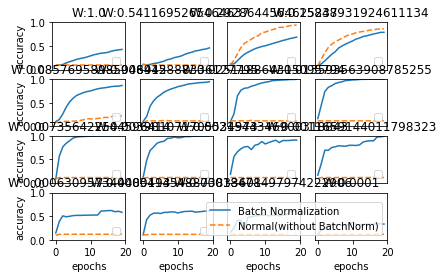

In [9]:
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()